In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Description of features

- **Pregnancies**: To express the Number of pregnancies

- **Glucose**: To express the Glucose level in blood

- **BloodPressure**: To express the Blood pressure measurement

- **SkinThickness**: To express the thickness of the skin

- **Insulin**: To express the Insulin level in blood

- **BMI**: To express the Body mass index

- **DiabetesPedigreeFunction**: indicates the function which scores likelihood of diabetes based on family histor

- **Age**: To express the age

- **Outcome**: To express the final result 1 is Yes and 0 is No

In [3]:
des = df.describe()
des

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Correlation Matrix 

In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


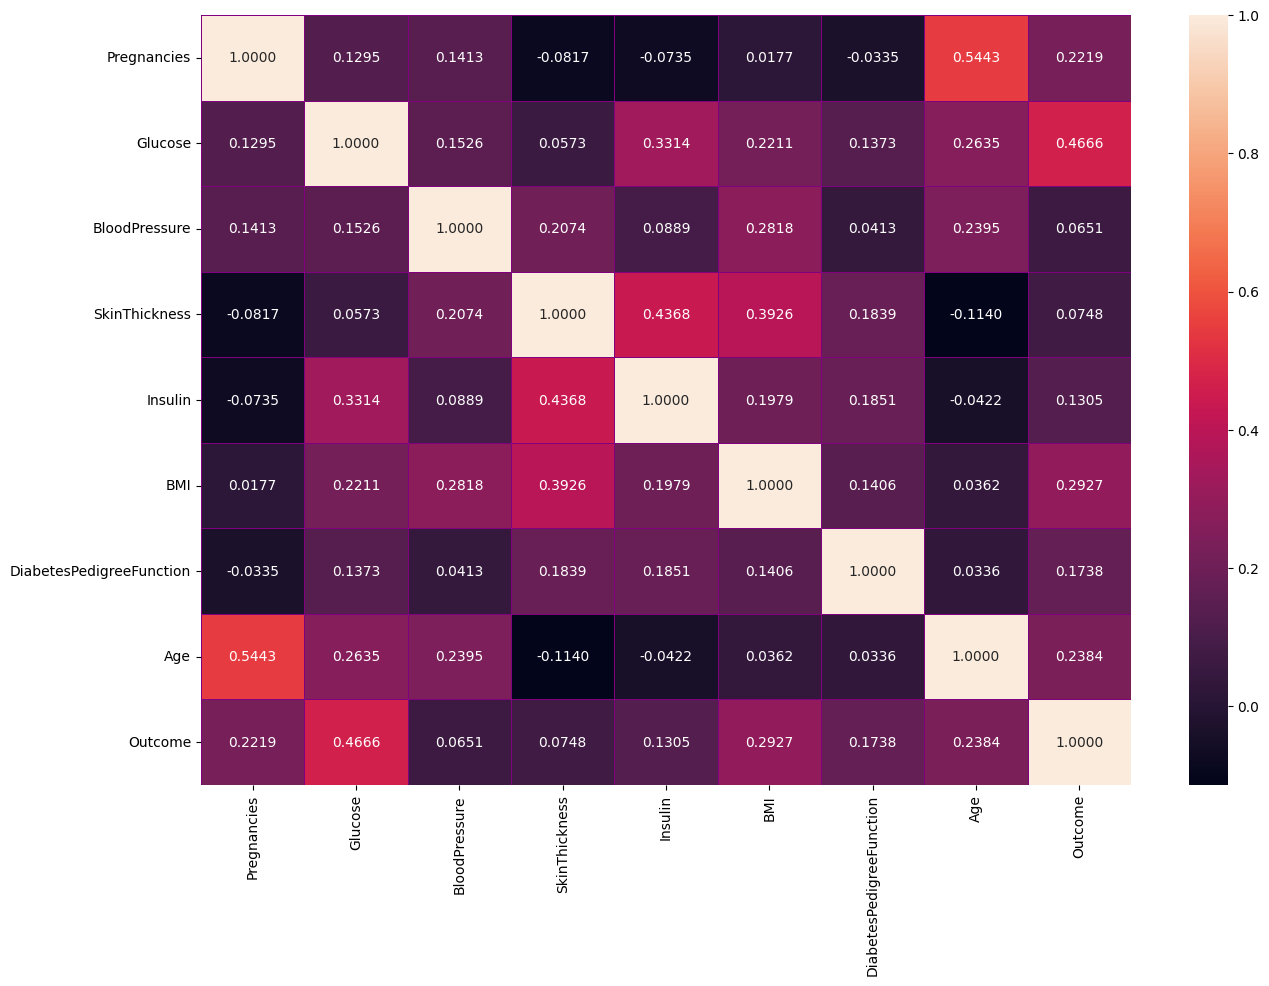

In [5]:
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "purple", fmt = ".4f", ax = ax)
plt.show()

 ### Top Factors impacting Diabetes outcome from higher to lower order:
 - **Glucose**: It stops the body from using insulin properly, which can lead to high levels of blood sugar if not treated and is the most impactful factor for   diabetes outcome as could be seen from the corr matrix 
 - **BMI**: In an obese individual(high BMI), the amount of NEFA, glycerol, hormones, cytokines, proinflammatory substances, and other substances that are       involved in the development of insulin resistance are increased. Insulin resistance with impairment of β-cell function leads to the development of                 diabetes. 
 - **Age**: Older adults are at high risk for the development of type 2 diabetes due to the combined effects of increasing insulin resistance and impaired pancreatic islet function with aging.
 - **Pregnancy**: Pregnancy can cause a temporary form of diabetes known as gestational diabetes.However, it can increase the risk of developing type 2 diabetes later in life.Gestational diabetes occurs when the body is not able to produce enough insulin to regulate blood sugar levels during pregnancy. This happens because the hormones produced by the placenta can interfere with the action of insulin, making it less effective. As a result, blood sugar levels can rise



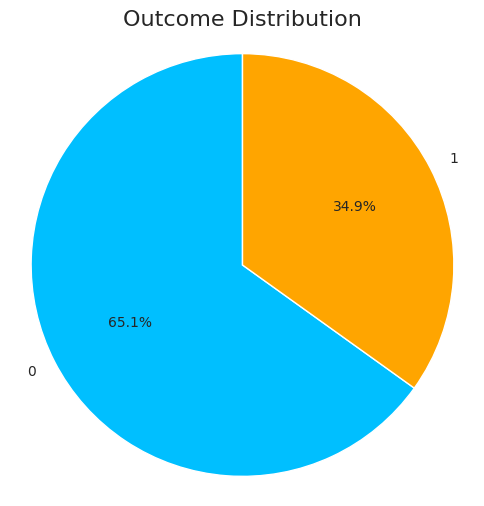

0    500
1    268
Name: Outcome, dtype: int64


In [6]:
counts = df['Outcome'].value_counts()
labels = ['0', '1']
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#00BFFF', '#FFA500'])
plt.title("Outcome Distribution", fontsize=16)
plt.axis('equal')
plt.show()
print(df.Outcome.value_counts())

## Pregnancy Stats

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


<AxesSubplot: xlabel='Pregnancies', ylabel='Pregnancies'>

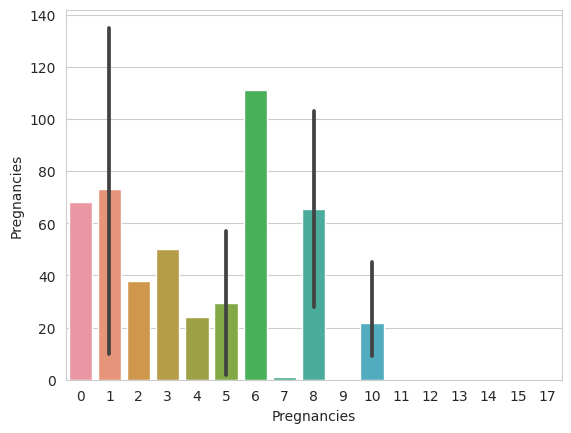

In [10]:
print(df["Pregnancies"].value_counts())
sns.barplot(data=df, x="Pregnancies", y=df.Pregnancies.value_counts())

## Box Plot

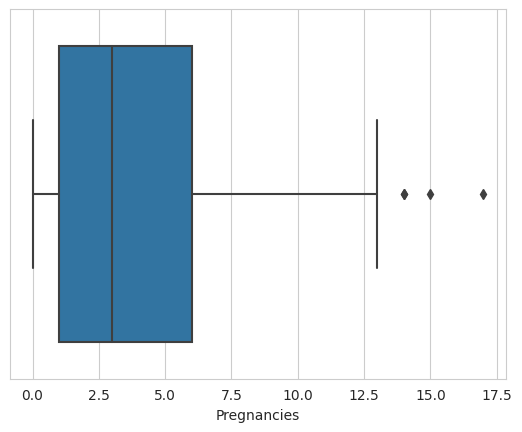

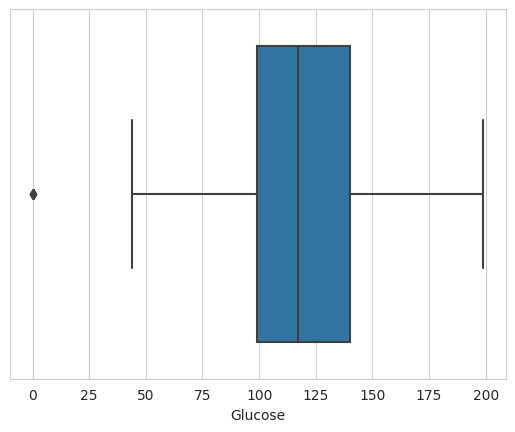

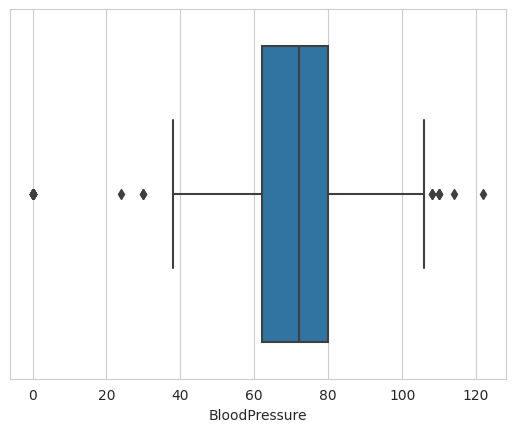

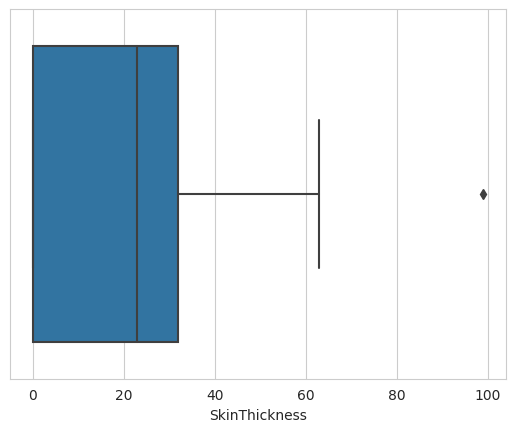

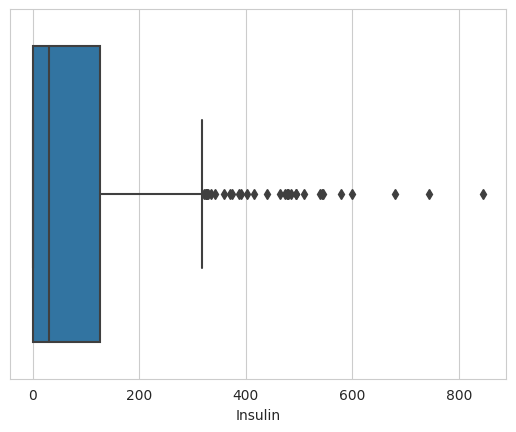

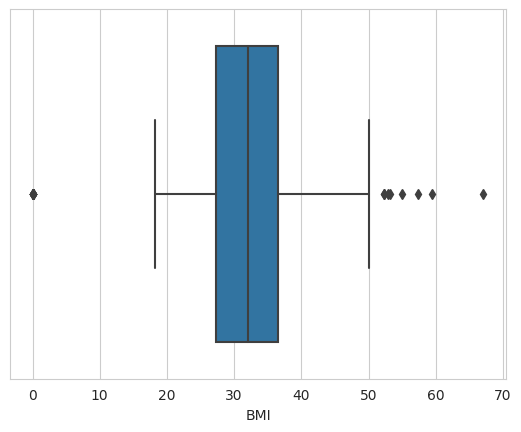

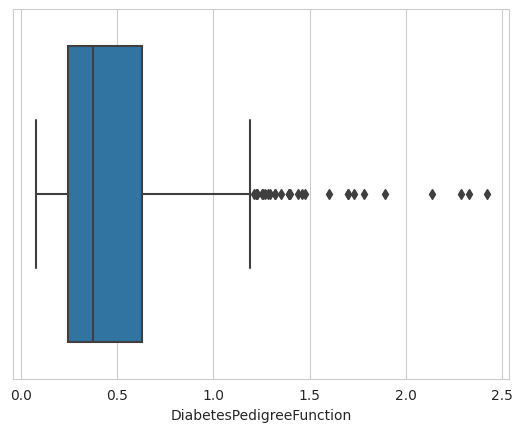

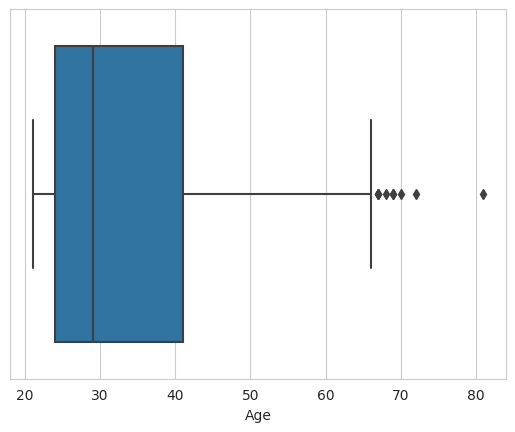

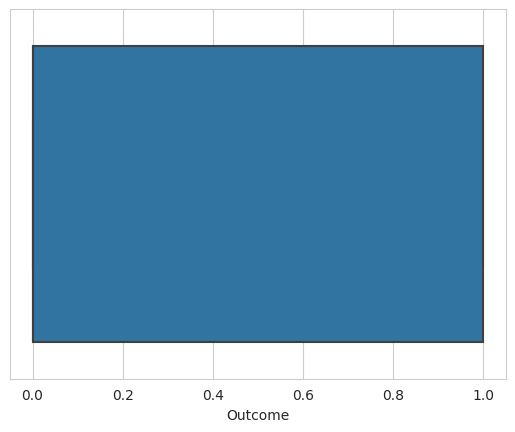

In [11]:
for c in df.columns:
    plt.figure()
    sns.boxplot(x = c, data = df, orient = "v")

As we can see there are lot of outliers in the box plot so we are now going to filter it with IQR formula

## Removing Outliers

In [12]:
def cleanColumn(df,columns, thr = 1.5):
    column_desc = des[columns]
    
    q3 = column_desc[6]
    q1 = column_desc[4]
    IQR = q3 - q1
    
    top_limit_clm = q3 + thr * IQR
    bottom_limit_clm = q1 - thr * IQR
    
    filter_clm_bottom = bottom_limit_clm < df[columns]
    filter_clm_top = df[columns] < top_limit_clm
    
    filters = filter_clm_bottom & filter_clm_top
    
    df = df[filters]
    
    print("{} of dataset after column {}".format(df.shape, columns))
    
    return df

In [13]:
for i in df.columns:
    df = cleanColumn(df,i)

(764, 9) of dataset after column Pregnancies
(759, 9) of dataset after column Glucose
(714, 9) of dataset after column BloodPressure
(713, 9) of dataset after column SkinThickness
(679, 9) of dataset after column Insulin
(671, 9) of dataset after column BMI
(646, 9) of dataset after column DiabetesPedigreeFunction
(639, 9) of dataset after column Age
(639, 9) of dataset after column Outcome


In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values present in any of columns

## Distribution plot

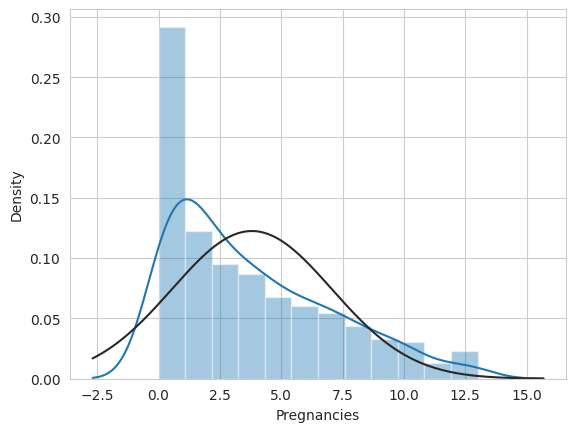

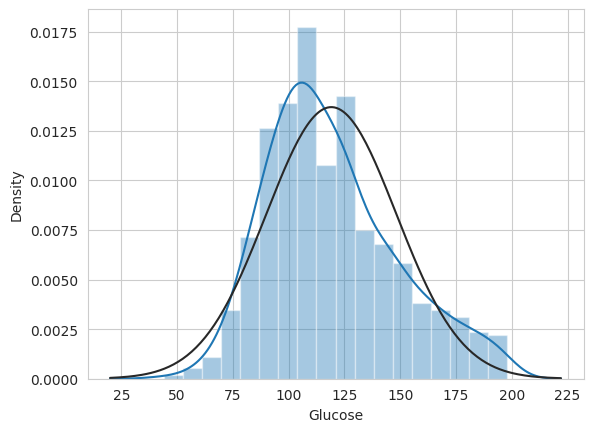

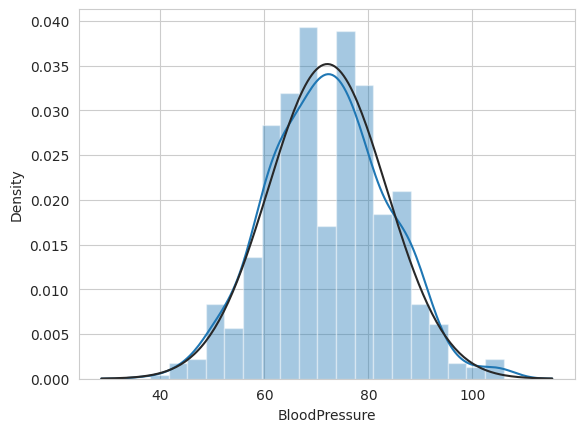

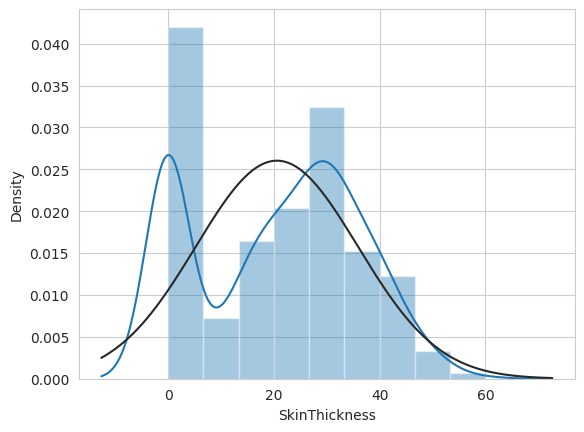

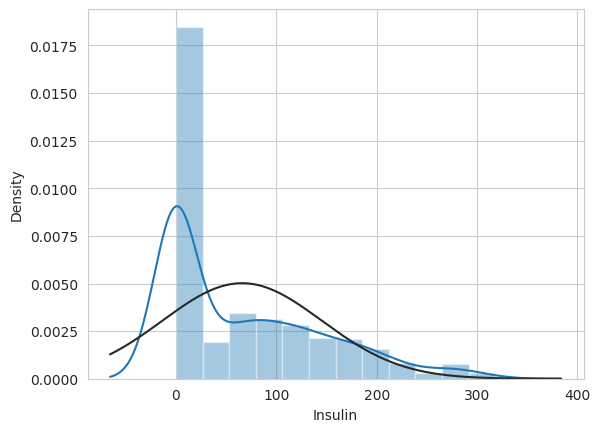

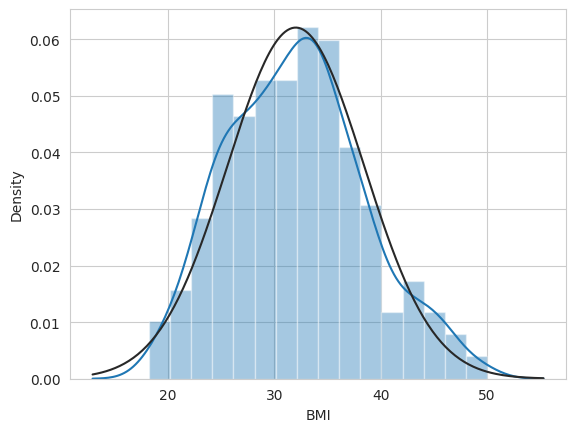

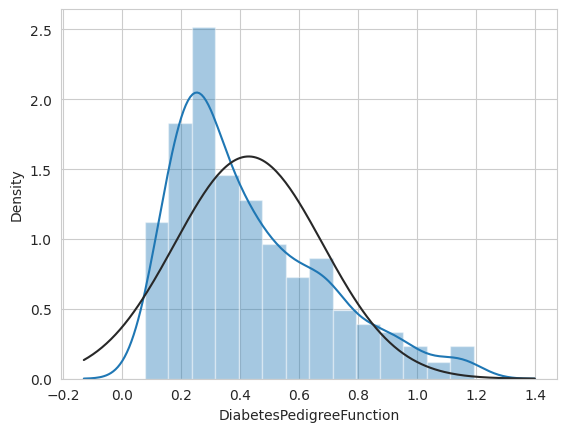

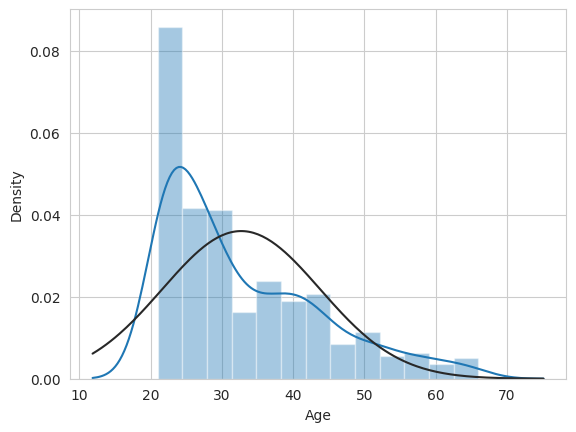

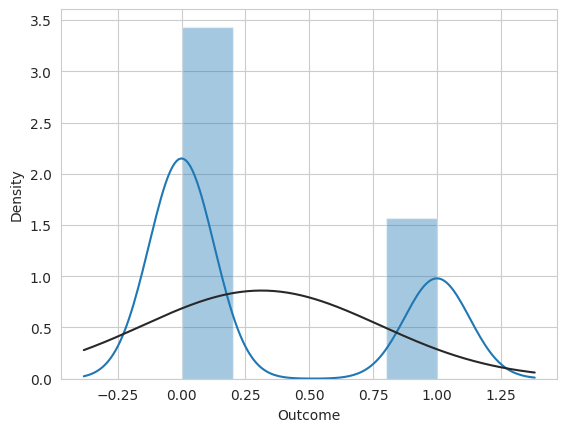

In [15]:
from scipy import stats
from scipy.stats import norm, skew

for i in df.columns:
    plt.figure()
    sns.distplot(df[i], fit = norm)
    plt.show()

## Pair Plot

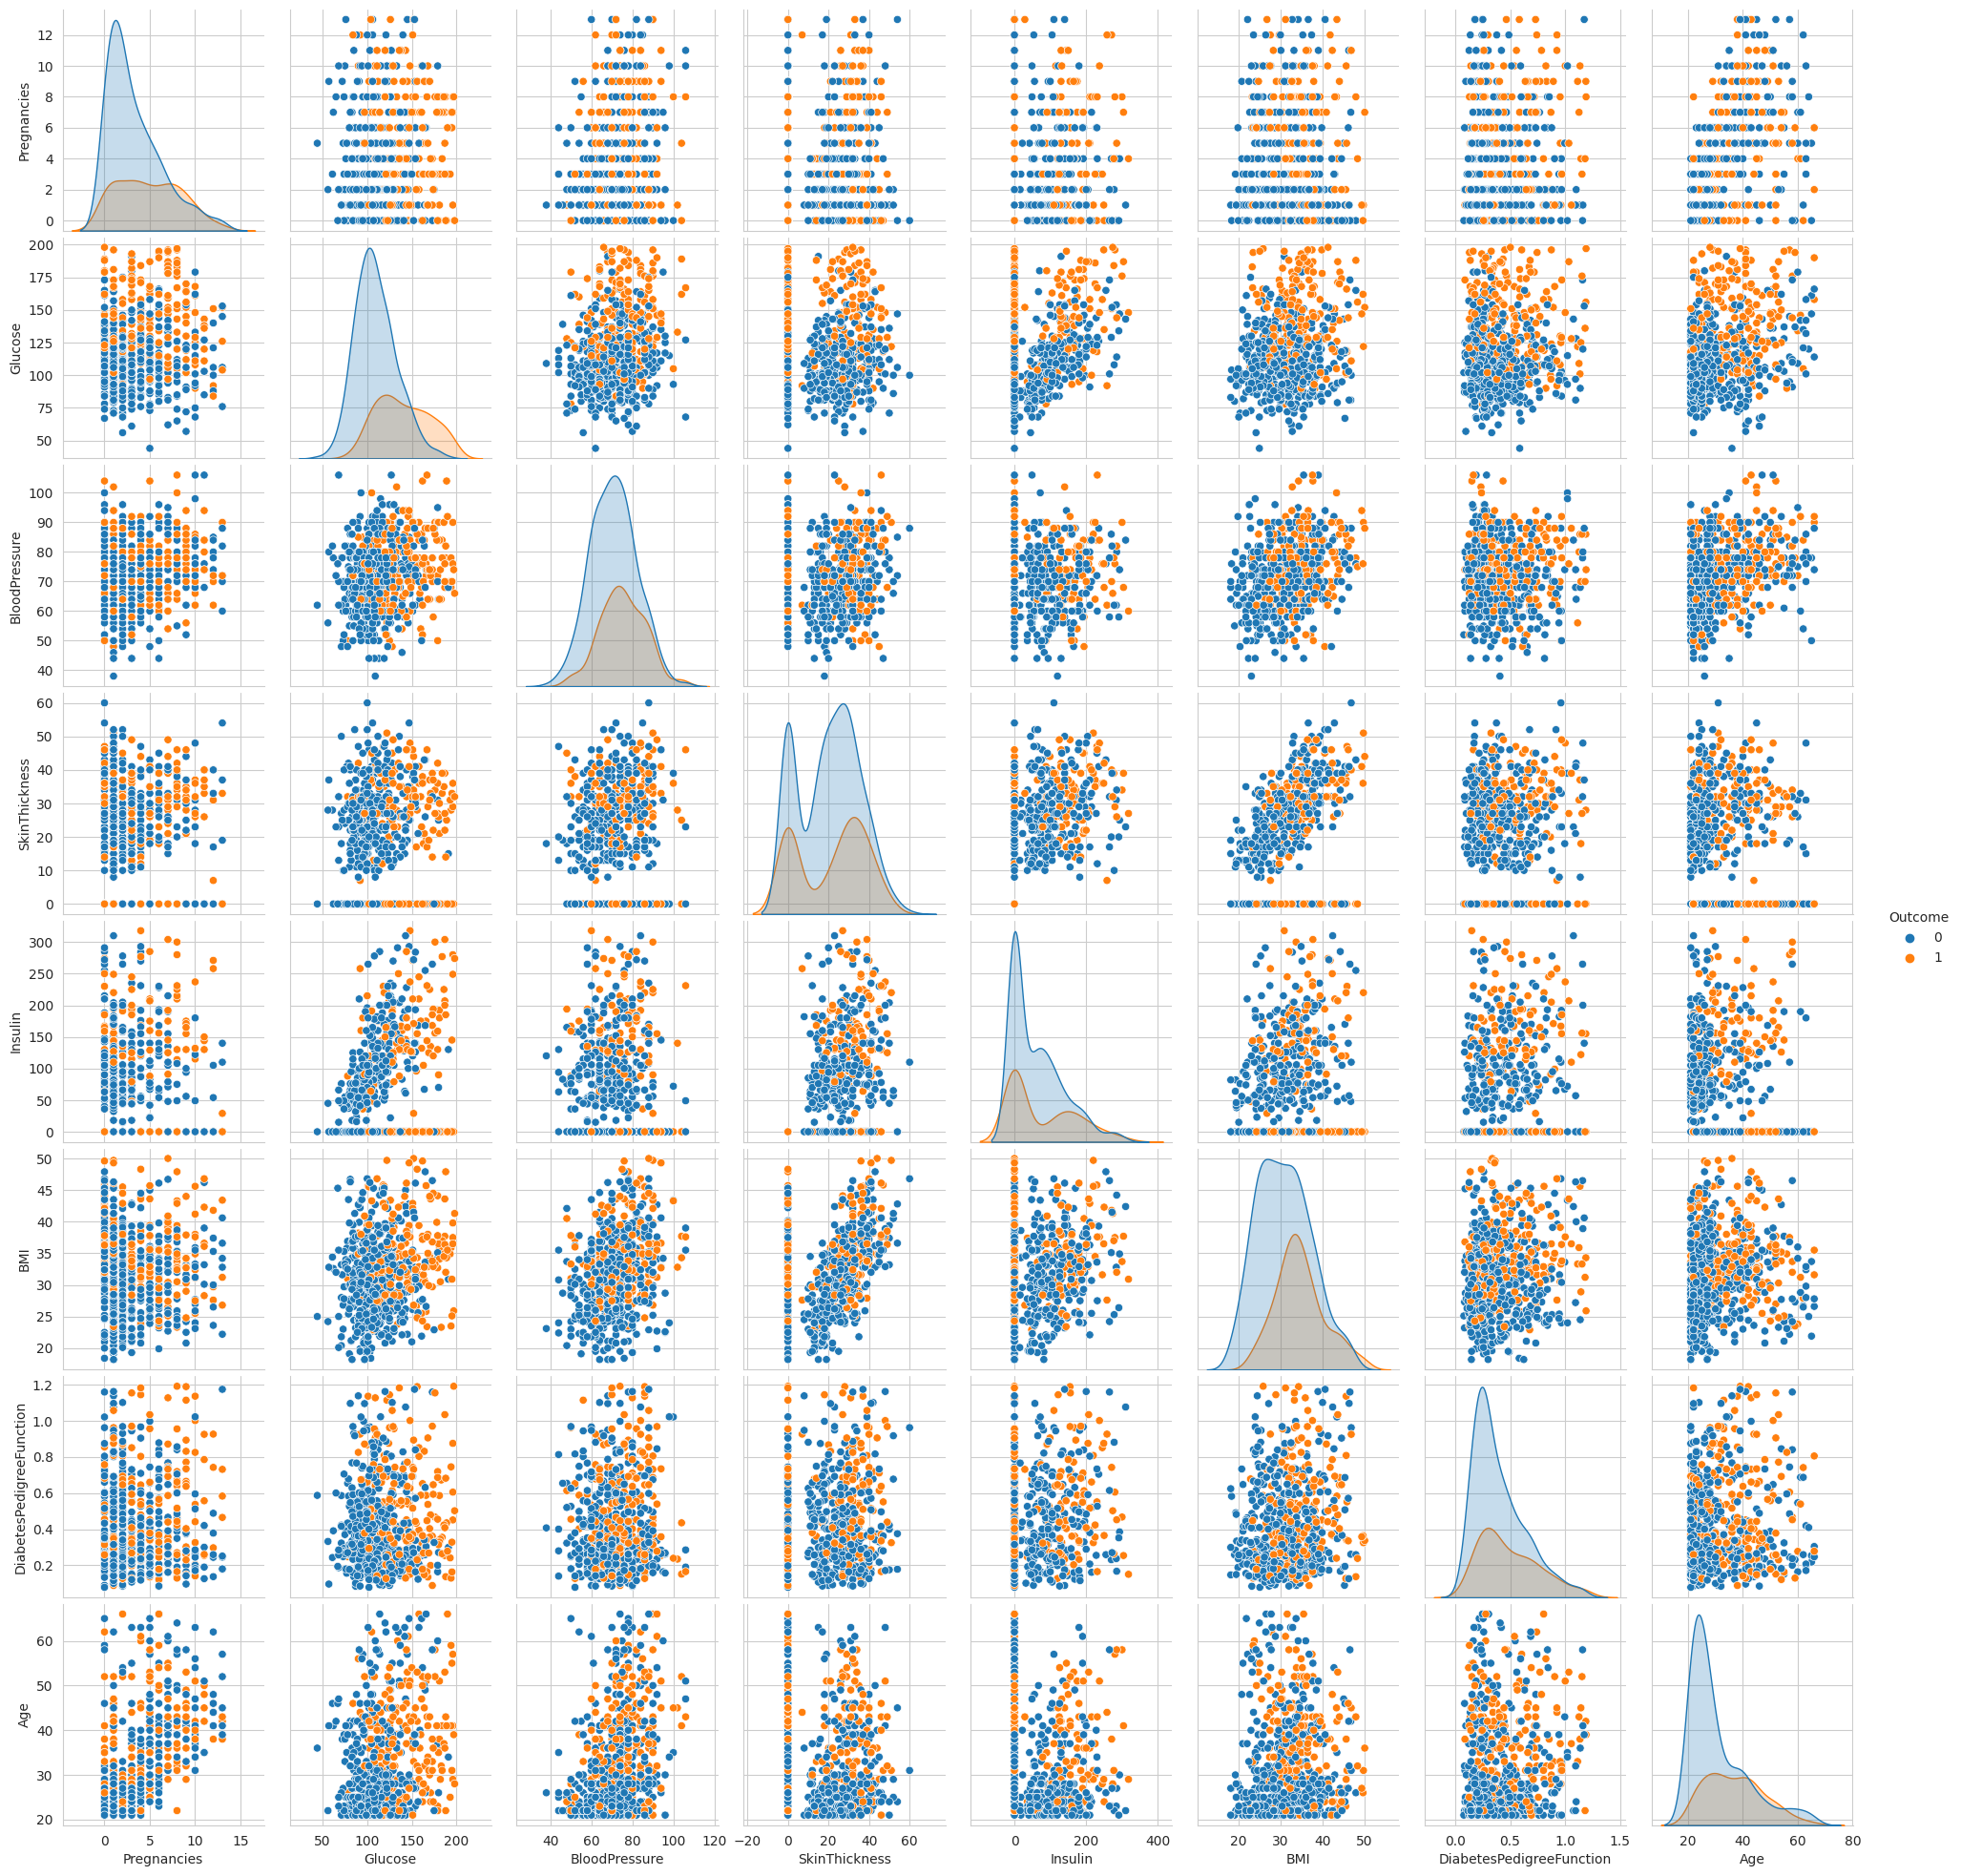

In [16]:
sns.pairplot(df, hue = "Outcome")
plt.show()

## ProbPlot

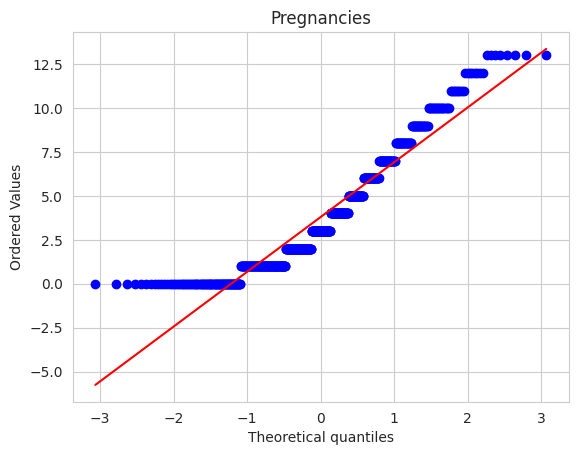

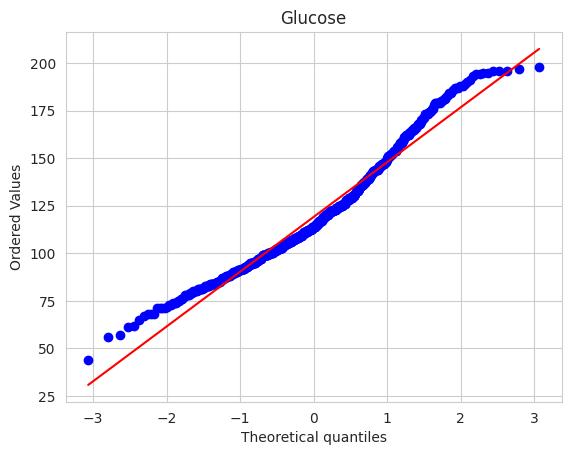

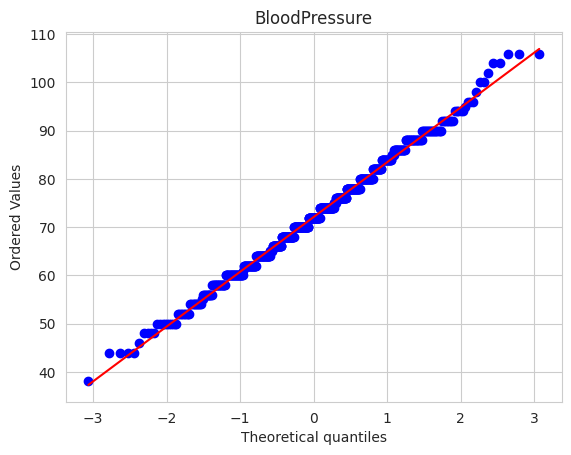

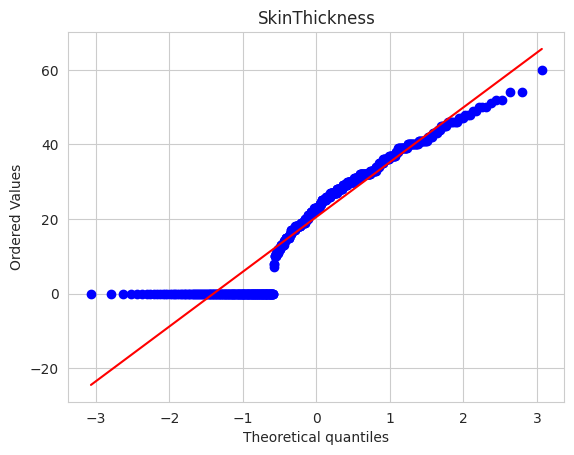

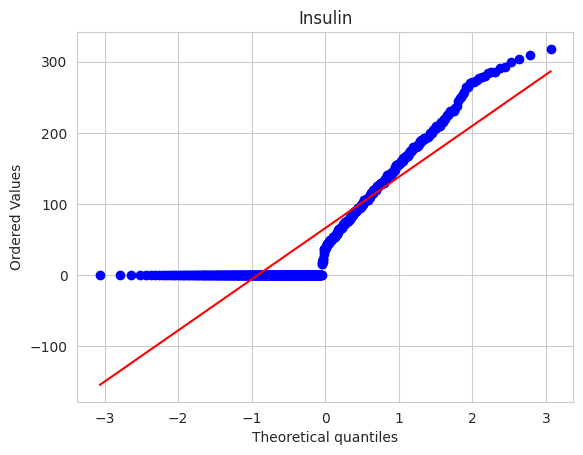

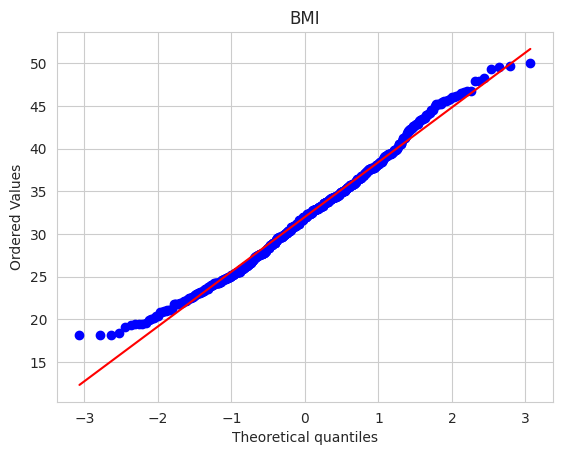

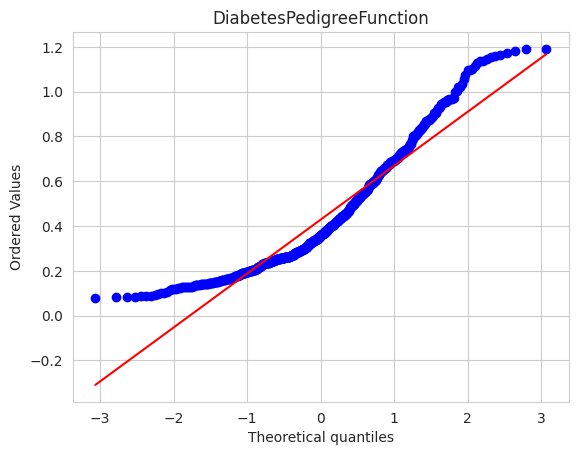

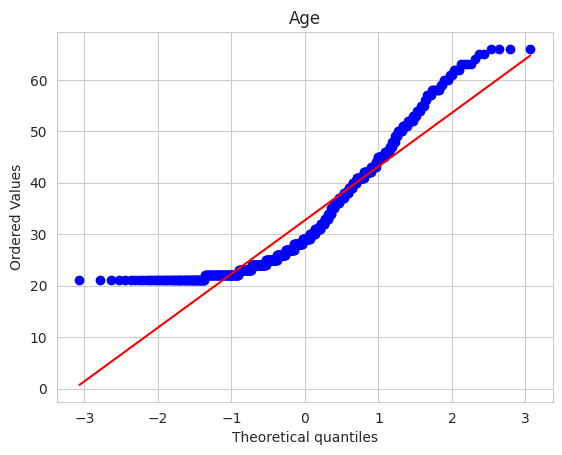

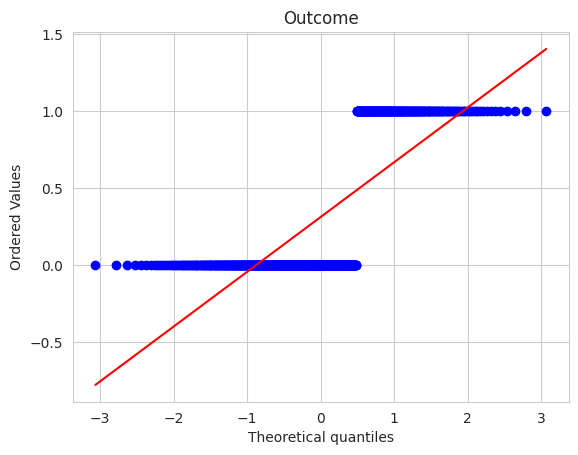

In [17]:
for i in df.columns:
    plt.figure()
    stats.probplot(df[i], plot = plt)
    plt.title(i)
    plt.show()

## Importing libararies for ML Classfications and Sampling Techniques

In [18]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


df_majority_0 = df[(df['Outcome']==0)] 

df_minority_1 = df[(df['Outcome']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples= 440, 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

<AxesSubplot: xlabel='Outcome', ylabel='count'>

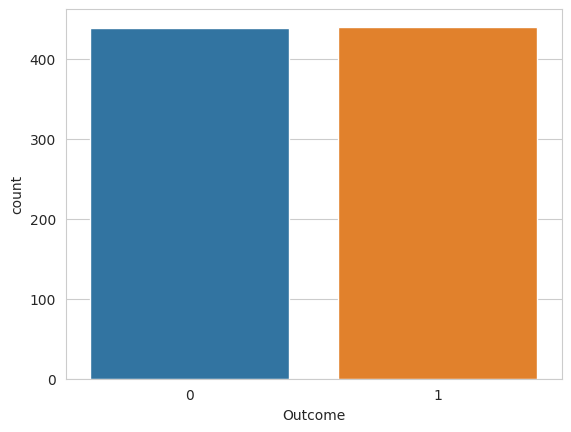

In [19]:
sns.countplot(x=df_upsampled['Outcome'])

In [20]:
X = df_upsampled.drop(columns='Outcome')
y = df_upsampled['Outcome']

## Train Test Split 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

# Applying Classifier models with hyperparameter tuning using GridSearchCV

## Gradient Boosting Classifier Model

Best hyperparameters:  {'learning_rate': 1, 'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 50}
Train score for GBC:  1.0
Test score for GBC:  0.8977272727272727
Accuracy for GBC:  0.8977272727272727
f1 score:  0.8975289416465887


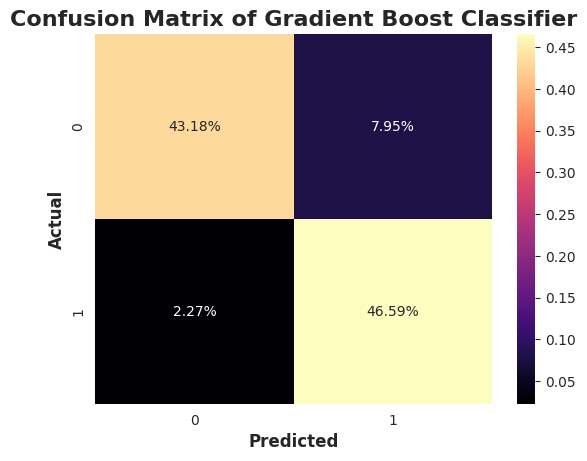

In [22]:
# Define the GradientBoostingClassifier model
gbc = GradientBoostingClassifier()

# Define the hyperparameters to tune using GridSearchCV
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'min_samples_split': [2, 4, 6]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gbc, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Get the train and test accuracy scores
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

# Get the predictions on the test set
y_pred = grid_search.predict(X_test)

# Compute the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
f1_score_gbc = f1_score(y_test, y_pred, average='weighted')

# Print the train score, test score, and accuracy
print("Train score for GBC: ", train_score)
print("Test score for GBC: ", test_score)
print("Accuracy for GBC: ", accuracy)
print("f1 score: ", f1_score_gbc)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='magma')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

mod_acc = {}
f1_acc = {}
mod_acc['Gradient Boost Classifier'] = accuracy
f1_acc['Gradient Boost Classifier'] = f1_score_gbc

## Random Forest Classifier model

Best hyperparameters:  {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
Train score:  0.9359886201991465
Test score:  0.8863636363636364
Accuracy:  0.8863636363636364
f1 score:  0.8860107284020327


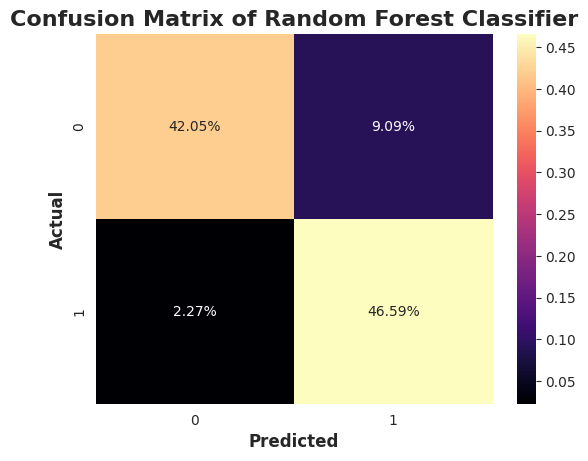

In [23]:
# Define the RandomForestClassifier model
rfc = RandomForestClassifier()

# Define the hyperparameters to tune using GridSearchCV
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rfc, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Get the train and test accuracy scores
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

# Get the predictions on the test set
y_pred = grid_search.predict(X_test)

# Compute the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
f1_score_rfc = f1_score(y_test, y_pred, average='weighted')

# Print the train score, test score, and accuracy
print("Train score: ", train_score)
print("Test score: ", test_score)
print("Accuracy: ", accuracy)
print("f1 score: ", f1_score_rfc)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='magma')
plt.title('Confusion Matrix of Random Forest Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
mod_acc['Random Forest Classifier'] = accuracy
f1_acc['Random Forest Classifier'] = f1_score_rfc

## Logistic Regression Model

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Train score:  0.7610241820768137
Test score:  0.7784090909090909
Accuracy:  0.7784090909090909
f1 score:  0.7783733215936605


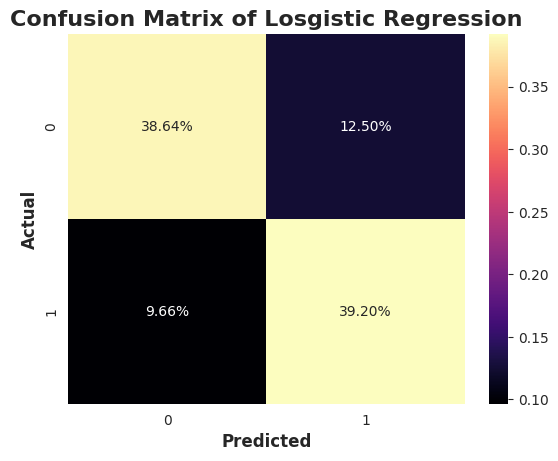

In [24]:
# Define the LogisticRegression model
lr = LogisticRegression()

# Define the hyperparameters to tune using GridSearchCV
params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lr, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Get the train and test accuracy scores
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

# Get the predictions on the test set
y_pred = grid_search.predict(X_test)

# Compute the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
f1_score_lr = f1_score(y_test, y_pred, average='weighted')
# Print the train score, test score, and accuracy
print("Train score: ", train_score)
print("Test score: ", test_score)
print("Accuracy: ", accuracy)
print("f1 score: ", f1_score_lr)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='magma')
plt.title('Confusion Matrix of Losgistic Regression', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
mod_acc['Losgistic Regression'] = accuracy
f1_acc['Losgistic Regression'] = f1_score_lr

## XGBoost Classifier Model

Best hyperparameters:  {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1}
Train score:  1.0
Test score:  0.9090909090909091
Accuracy:  0.9090909090909091
f1 score:  0.9089969462062487


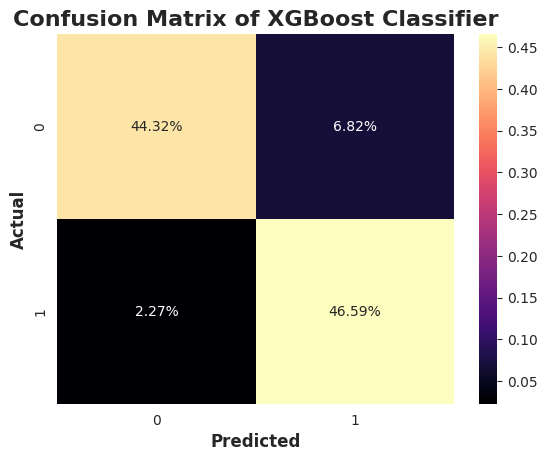

In [25]:
# Define the XGBClassifier model
xgb = XGBClassifier()

# Define the hyperparameters to tune using GridSearchCV
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [10, 50, 100],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Get the train and test accuracy scores
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

# Get the predictions on the test set
y_pred = grid_search.predict(X_test)

# Compute the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
f1_score_xgbc = f1_score(y_test, y_pred, average='weighted')
# Print the train score, test score, and accuracy
print("Train score: ", train_score)
print("Test score: ", test_score)
print("Accuracy: ", accuracy)
print("f1 score: ", f1_score_xgbc)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='magma')
plt.title('Confusion Matrix of XGBoost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
mod_acc['XGBoost Classifier'] = accuracy
f1_acc['XGBoost Classifier'] = f1_score_xgbc

## Decision Tree Classifier Model

DecisionTreeClassifier:
Train score:  0.7567567567567568
Test score:  0.7443181818181818
Accuracy:  0.7443181818181818
F1 score:  0.738210662521229


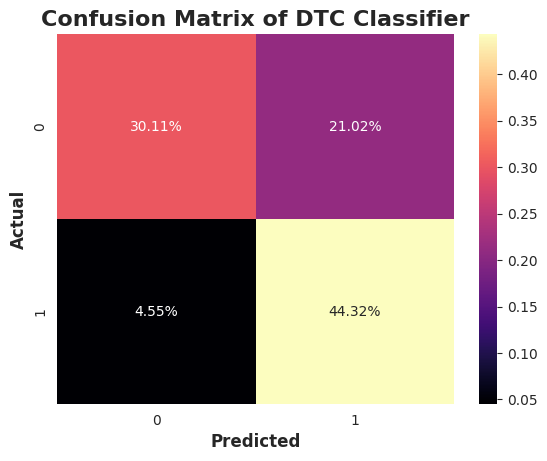

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training set
dt.fit(X_train, y_train)

# Get the train and test accuracy scores
train_score_dt = dt.score(X_train, y_train)
test_score_dt = dt.score(X_test, y_test)

# Get the predictions on the test set
y_pred_dt = dt.predict(X_test)

# Compute the accuracy and f1 score of the model on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print the train score, test score, and accuracy and f1 score
print("DecisionTreeClassifier:")
print("Train score: ", train_score_dt)
print("Test score: ", test_score_dt)
print("Accuracy: ", accuracy_dt)
print("F1 score: ", f1_score_dt)
cf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='magma')
plt.title('Confusion Matrix of DTC Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
mod_acc['Decison Tree Classifier'] = accuracy_dt
f1_acc['Decison Tree Classifier'] = f1_score_dt

Text(0.5, 1.0, 'Plotting the Model Accuracies')

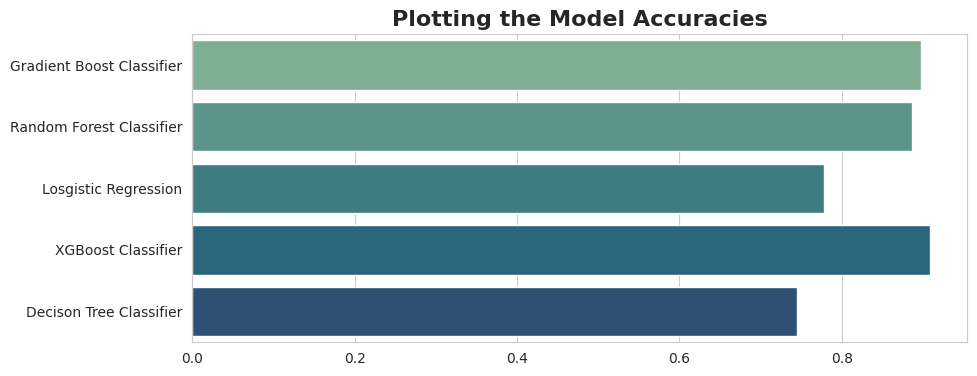

In [27]:
plt.figure(figsize = (10,4))
ax = sns.barplot(x = list(mod_acc.values()), y = list(mod_acc.keys()), palette='crest')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Plotting the Model F1 Scores')

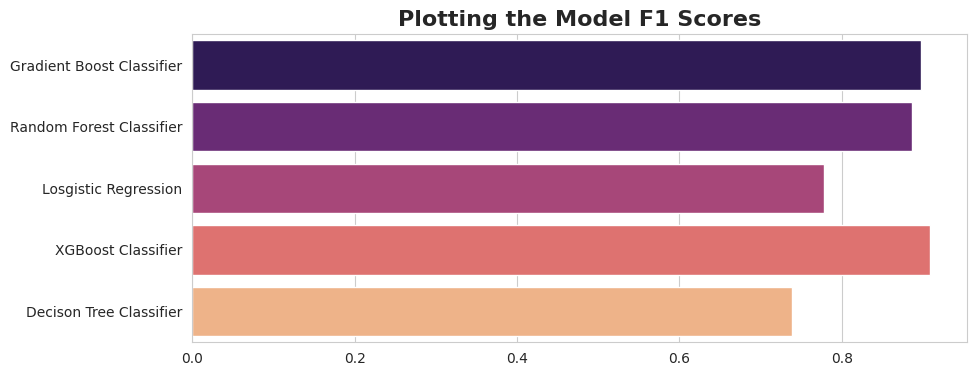

In [28]:
plt.figure(figsize = (10,4))
ax = sns.barplot(x = list(f1_acc.values()), y = list(f1_acc.keys()), palette='magma')
plt.title("Plotting the Model F1 Scores", fontsize=16, fontweight="bold")

### --ROC Curves and AUC plot will be updated soon--